In [1]:
import urllib
import pandas as pd
from pandas import read_sql
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
#from copy import deepcopy
import pymysql as mdb
import seaborn as sns

In [2]:
import base64
from PIL import Image
import io

In [3]:
afile="/Users/abramvandergeest/mysql_insightwiki_auth.txt"
a=open(afile)
passwd=a.readline().rstrip()
a.close()
host='localhost'; user='abram.ghost';db='wikidata'
con = mdb.connect(host, user, passwd, db,port=3307)
#con = mdb.connect(host, user, passwd, db)


In [4]:
#numtop=85

In [5]:

def datefromstr(str):
    return datetime.datetime(int(str[0:4]), int(str[5:7]),int(str[8:]))

def date_parse2(str):
    year =int(str[:4])
    month=int(str[4:6])
    day=int(str[6:8])
    hour=0
    return datetime.datetime(year,month,day,hour)

def gen_plot(inpid):
    with con:
        sql='''SELECT `page_views`.`dateonly` AS `vd`, AVG(`page_views`.`count`) AS `vc`, `topics`.`topic_label` AS `tl`,`topics`.`topic_string` 
            FROM `topics` INNER JOIN `page_views` ON `topics`.`ID` = `page_views`.`topic_id` 
            WHERE `topic_id`=%s GROUP BY `page_views`.`dateonly`   '''
        data=read_sql(sql, con,params=[inpid])

    xmin=datetime.datetime(2015,2,1)
    xmax=datetime.datetime(2015,10,1)
    ymin=0;ymax=1000;
    %matplotlib inline
    label= data[['tl']].values[0][0]
    data['date']=map(lambda x:date_parse2(x),data['vd'] )
    mul=1.5
    fig, ax = plt.subplots(figsize=(4*mul,3*mul),)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    fig.autofmt_xdate()
    #ax.xaxis.set_ticklabels([])
    ax.set_ylabel('Wikipedia Page Views', fontsize=14)
    #ax.yaxis.label.set_color('Gray')
    ax.tick_params(axis='both', which='major', labelsize=14)#,colors='Gray')
    ax.set_title(label, fontsize=20)
    #ax.title.set_color('Gray')
    sns.despine()
    ax.plot_date(data[['date']].values,data[['vc']].values,'.',ms=15,alpha=0.9)
    #plt.show()
    di=data[['date','vc']].values
    return([label,di])

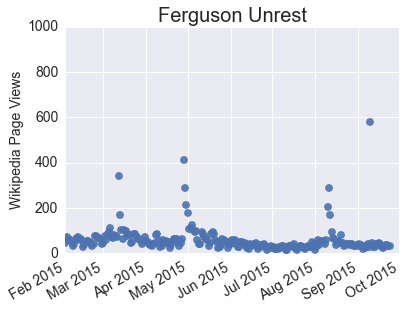

In [6]:
d=[[],[],[]]

inpid=82
d[0]=gen_plot(inpid)
inpid=81
d[1]=gen_plot(inpid)
inpid=83
d[2]=gen_plot(inpid)

Freddie Gray
Baltimore 2015 Riots
Ferguson Unrest


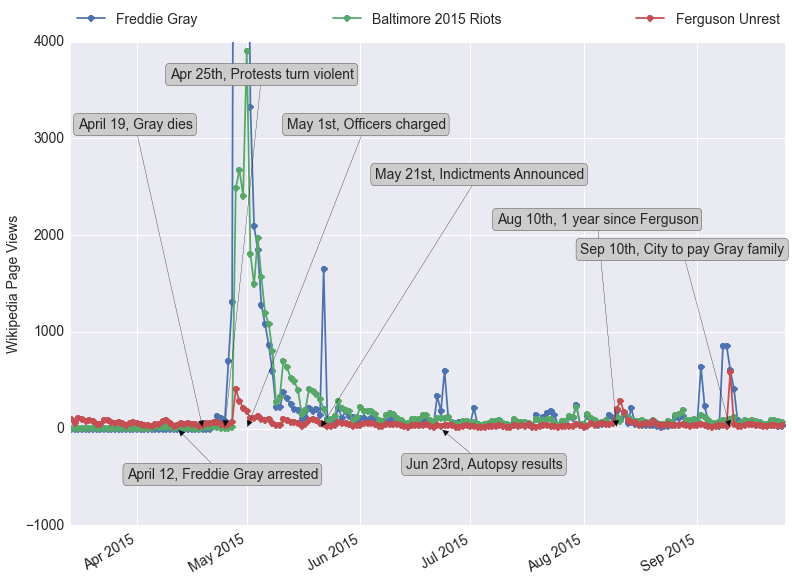

In [11]:
mul=3.2
ymin=-1000;ymax=4000
xmin=datetime.datetime(2015,3,14)
xmax=datetime.datetime(2015,9,25)
fig, ax = plt.subplots(figsize=(4*mul,3*mul),)
fig.autofmt_xdate()
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel('Wikipedia Page Views', fontsize=14)
for i in xrange(3):
    print d[i][0]
    plt.plot_date(d[i][1][:,0],d[i][1][:,1],'o-',label=d[i][0])#,d[1][1]['date'].values,d[1][1]['vc'].values,'o',d[1][1]['date'].values,d[1][1]['vc'].values)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,  ncol=3, mode="expand", borderaxespad=0.,fontsize=14)
#bbox_args = dict(boxstyle="round", fc="0.8")
#arrow_args = dict(arrowstyle="->")
#plt.annotate("several confounded points", xy=(datetime.datetime(2015,4,18,0), 0),
#             xycoords="data", textcoords="data",
#             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
x=datetime.datetime(2015,8,12)
y=0
ax.annotate('April 12, Freddie Gray arrested', (datetime.datetime(2015,4,12), y), xytext=(-50, -50), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)
#ax.annotate('April 18, Protests begin', (datetime.datetime(2015,4,18), y), xytext=(0, 175), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)
ax.annotate('April 19, Gray dies', (datetime.datetime(2015,4,19), y), xytext=(-125, 300), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

#ax.annotate('April 20, Protest at Police Headquarters', (datetime.datetime(2015,4,20), y), xytext=(30, 150), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

#ax.annotate('April 24, B. Police acknowledge mistakes', (datetime.datetime(2015,4,24), y), xytext=(30, 180), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('Apr 25th, Protests turn violent', (datetime.datetime(2015,4,25), y), xytext=(-55, 350), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

#ax.annotate('April 27th, Protests continue to expand', (datetime.datetime(2015,4,27), y), xytext=(0,75), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

#ax.annotate('April 30th, Obama speaks out', (datetime.datetime(2015,4,30), y), xytext=(60,150), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('May 1st, Officers charged', (datetime.datetime(2015,5,1), y), xytext=(40,300), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('May 21st, Indictments Announced', (datetime.datetime(2015,5,21), y), xytext=(55,250), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('Jun 23rd, Autopsy results', (datetime.datetime(2015,6,23), y), xytext=(-35,-40), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('Aug 10th, 1 year since Ferguson', (datetime.datetime(2015,8,10), y), xytext=(-120,205), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

#ax.annotate('Sep 2nd, Officers tried sep.', (datetime.datetime(2015,9,2), y), xytext=(-150,-65), 
#            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
#            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

ax.annotate('Sep 10th, City to pay Gray family', (datetime.datetime(2015,9,10), y), xytext=(-150,175), 
            textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(fc='k',arrowstyle='-|>'),fontsize=14)

plt.show()

Freddie Gray
Baltimore 2015 Riots
Ferguson Unrest


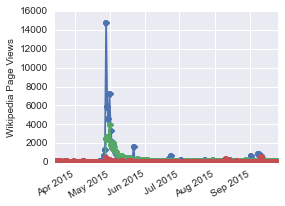

In [8]:
mul=1
ymin=0;ymax=4000
fig, ax = plt.subplots(figsize=(4*mul,3*mul),)
fig.autofmt_xdate()
#ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Wikipedia Page Views', fontsize=10)

for i in xrange(3):
    print d[i][0]
    plt.plot_date(d[i][1][:,0],d[i][1][:,1],'o-',label=d[i][0])#,d[1][1]['date'].values,d[1][1]['vc'].values,'o',d[1][1]['date'].values,d[1][1]['vc'].values)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,  ncol=3, mode="expand", borderaxespad=0.,fontsize=14)
plt.show()